<a href="https://colab.research.google.com/github/KaziTanvir/Fashion-Product-Classifer-using-CNN/blob/main/Fashion_Product_Classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion Product Classifier

### **What is fashion product classifier?**

Visual classiﬁcation of commercial products is a branch of the wider ﬁelds of objectdetection and feature extraction in computer vision, and, in particular, it is an important step inthe creative workﬂow in fashion industries. Automatically classifying garment features makesboth designers and data experts aware of their overall production, which is fundamental in orderto organize marketing campaigns, avoid duplicates, categorize apparel products for e-commercepurposes,and so on. 


# Importing Dataset from kaggle

In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/paramaggarwal/fashion-product-images-small")

Skipping, found downloaded files in "./fashion-product-images-small" (use force=True to force download)


In [4]:
cd fashion-product-images-small/

/content/fashion-product-images-small


# Preparing the data

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("styles.csv",error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 1

In [7]:
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch


#### Adding .jpg extention to state the image path

In [8]:
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)

In [9]:
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch,30039.jpg


#### Randomizing the data

In [10]:
df = df.sample(frac=1)

In [11]:
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
22638,17221,Men,Accessories,Eyewear,Sunglasses,Blue,Winter,2016.0,Casual,United Colors of Benetton Men Funky Eyewear Bl...,17221.jpg
21675,33494,Men,Apparel,Bottomwear,Shorts,Brown,Summer,2012.0,Casual,Doodle Kids Boy Brown Shorts,33494.jpg
10034,46599,Women,Footwear,Shoes,Heels,Tan,Summer,2012.0,Casual,Catwalk Women Tan Heels,46599.jpg
19345,11955,Men,Footwear,Shoes,Casual Shoes,Blue,Fall,2012.0,Casual,Ganuchi Men Casual Blue Casual Shoes,11955.jpg
13998,22239,Men,Footwear,Shoes,Casual Shoes,Navy Blue,Summer,2011.0,Casual,ID Men Navy Blue Casual Shoes,22239.jpg
15805,47600,Women,Footwear,Shoes,Flats,Brown,Winter,2012.0,Casual,Portia Women Maroon Flats,47600.jpg
42646,27269,Women,Apparel,Topwear,Kurtas,Green,Fall,2011.0,Ethnic,Mother Earth Women Printed Green Kurta,27269.jpg
8857,12045,Men,Apparel,Topwear,Shirts,Black,Fall,2011.0,Casual,Spykar Men Solid Black Shirts,12045.jpg
10365,58450,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Fossil Men Black Dial Chronograph Watch FS4646,58450.jpg
44216,37856,Women,Accessories,Bags,Handbags,Black,Summer,2012.0,Casual,Hidekraft Women Black Handbag,37856.jpg


In [12]:
df = df.sample(frac=1).reset_index(drop=True)

In [13]:
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,4749,Men,Apparel,Topwear,Tshirts,Red,Summer,2011.0,Casual,ADIDAS Men's Polo Red Polo T-shirt,4749.jpg
1,4586,Unisex,Accessories,Bags,Backpacks,Red,Winter,2015.0,Casual,Wildcraft Unisex Contour Red Backpack,4586.jpg
2,48675,Women,Accessories,Jewellery,Earrings,Silver,Summer,2013.0,Casual,Lucera Women Silver Earrings,48675.jpg
3,2293,Women,Apparel,Topwear,Tshirts,Pink,Fall,2010.0,Casual,Nike Women Accuracy Pink T-shirt,2293.jpg
4,41028,Men,Accessories,Headwear,Caps,Olive,Summer,2012.0,Casual,Lee Men Olive Cap,41028.jpg
5,40064,Men,Apparel,Topwear,Tshirts,Black,Summer,2012.0,Casual,ADIDAS Men Black Graphic T-shirt,40064.jpg
6,12140,Women,Apparel,Topwear,Kurtas,Red,Fall,2011.0,Ethnic,Aurelia Women Solid Red Kurtas,12140.jpg
7,34629,Men,Footwear,Shoes,Sports Shoes,Black,Summer,2012.0,Sports,Lotto Men Black Basketball Mid II Sports Shoes,34629.jpg
8,38189,Men,Accessories,Eyewear,Sunglasses,Black,Winter,2016.0,Casual,Polaroid Men Black Sunglasses,38189.jpg
9,30048,Women,Accessories,Watches,Watches,White,Winter,2016.0,Casual,SKAGEN DENMARK Women White Dial Watch 589SSS,30048.jpg


#### Preparing the ImageDataGenerator

In [14]:
from keras_preprocessing.image import ImageDataGenerator
batch_size = 256

image_generator = ImageDataGenerator(
    validation_split=0.2
)

training_generator = image_generator.flow_from_dataframe(
    dataframe=df,
    directory="images",
    x_col="image",
    y_col="masterCategory",
    target_size=(60,80),
    batch_size=batch_size,
    subset="training"
)

validation_generator = image_generator.flow_from_dataframe(
    dataframe=df,
    directory="images",
    x_col="image",
    y_col="masterCategory",
    target_size=(60,80),
    batch_size=batch_size,
    subset="validation"
)
classes = len(training_generator.class_indices)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 5 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 35536 validated image filenames belonging to 7 classes.
Found 8883 validated image filenames belonging to 7 classes.


In [15]:
classes

7

# Creating the model

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [17]:
#Initializing the model
classifier = Sequential()

classifier.add(Conv2D(32,(3,3),input_shape = (60,80,3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size=(3, 3)))

classifier.add(Conv2D(32,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(3, 3)))

classifier.add(Flatten())

classifier.add(Dense(units=32,activation = 'relu'))
classifier.add(Dense(units=64,activation = 'relu'))
classifier.add(Dense(units=128,activation = 'relu'))
classifier.add(Dense(units=256,activation = 'relu'))
classifier.add(Dense(units=512,activation = 'relu'))

classifier.add(Dense(units=7,activation = 'softmax'))

classifier.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [18]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 78, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 26, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 32)                4

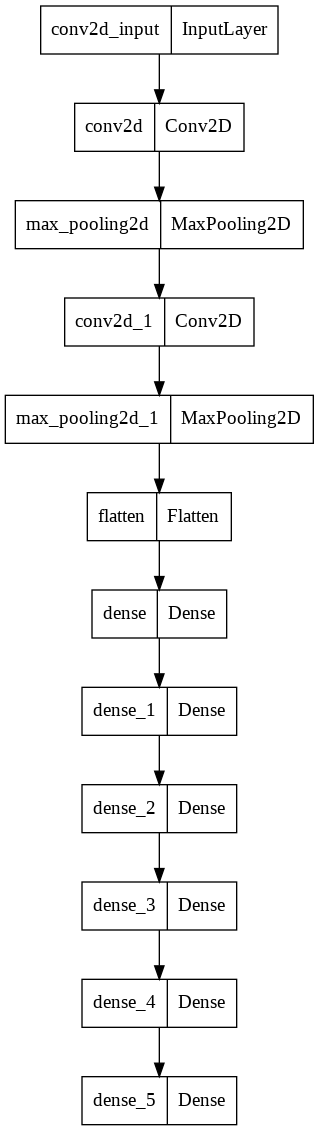

In [19]:
import tensorflow as tf

tf.keras.utils.plot_model(classifier)


# Training the model

In [20]:
from math import ceil

classifier.fit_generator(
    generator=training_generator,
    steps_per_epoch=ceil(0.8 * (df.shape[0] / batch_size)),

    validation_data=validation_generator,
    validation_steps=ceil(0.2 * (df.shape[0] / batch_size)),

    epochs=20,
    verbose=2
)

loss, acc = classifier.evaluate_generator(validation_generator, steps=ceil(0.2 * (df.size / batch_size)))


Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


139/139 - 26s - loss: 0.7719 - accuracy: 0.7928 - val_loss: 0.2667 - val_accuracy: 0.9099 - 26s/epoch - 190ms/step
Epoch 2/20
139/139 - 16s - loss: 0.2349 - accuracy: 0.9254 - val_loss: 0.2062 - val_accuracy: 0.9335 - 16s/epoch - 116ms/step
Epoch 3/20
139/139 - 16s - loss: 0.1823 - accuracy: 0.9441 - val_loss: 0.1982 - val_accuracy: 0.9395 - 16s/epoch - 116ms/step
Epoch 4/20
139/139 - 18s - loss: 0.1565 - accuracy: 0.9524 - val_loss: 0.1572 - val_accuracy: 0.9522 - 18s/epoch - 129ms/step
Epoch 5/20
139/139 - 24s - loss: 0.1386 - accuracy: 0.9587 - val_loss: 0.1522 - val_accuracy: 0.9515 - 24s/epoch - 174ms/step
Epoch 6/20
139/139 - 16s - loss: 0.1288 - accuracy: 0.9620 - val_loss: 0.1456 - val_accuracy: 0.9543 - 16s/epoch - 117ms/step
Epoch 7/20
139/139 - 19s - loss: 0.1207 - accuracy: 0.9636 - val_loss: 0.1282 - val_accuracy: 0.9596 - 19s/epoch - 135ms/step
Epoch 8/20
139/139 - 17s - loss: 0.1059 - accuracy: 0.9694 - val_loss: 0.1317 - val_accuracy: 0.9601 - 17s/epoch - 119ms/step
Epo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


In [33]:
#saving the model
classifier.save("model.h5")

In [47]:
import numpy as np
from keras.preprocessing import image

filename = "15971.jpg"

from keras.models import load_model
new_model = load_model('model.h5')
new_model.summary()
test_image = image.load_img("images/"+filename,target_size=(60,80))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = new_model.predict(test_image)
print(result)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 78, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 26, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 32)                4

[[1.0697607e-02 9.8898357e-01 1.6251588e-04 5.5681219e-05 6.0377815e-08
  3.9562638e-05 6.0965249e-05]]


In [48]:
val = np.argmax(result)
print(val)

1


In [49]:
my_dict = training_generator.class_indices
key_list = list(my_dict.keys()) 
val_list = list(my_dict.values()) 
print(key_list[val])

Apparel


In [50]:
import pickle
# save the model to disk
filename1 = 'key_list'
filename = 'val_list'
pickle.dump(key_list, open(filename1, 'wb'))
pickle.dump(val_list, open(filename, 'wb'))

# Accuracy Score

In [51]:
print("\n%s: %.2f%%" % (new_model.metrics_names[1], acc * 100))


accuracy: 97.25%
